### Пункт 1

In [292]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [293]:
iris = load_iris()

In [294]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [295]:
# загрузим полученные данные в датафрейм  
data_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
data_iris['target'] = iris.target
data_iris['iris_names'] = data_iris.target.apply(lambda i : iris.target_names[i])
data_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,iris_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


### Пункт 2

In [296]:
# Оставим два признака - sepal_length и sepal_width
# Целевую переменная - variety (разнобразие). Если я правильно понял, расчет идет по всем разновидностям Ириса.
data_iris = data_iris[['sepal length (cm)', 'sepal width (cm)', 'iris_names']]
data_iris

,sepal length (cm),sepal width (cm),iris_names
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


### Пункт 3

In [297]:
# Разделим нашу выборку на тренировочную и тестовую. Выделим 30% даных на обучение.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.30)

### Пункт 4

In [298]:
# Построbv модель LDA
# Для этого мпортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [299]:
# Проведем обучение наших данных
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [300]:
# Делаем прогноз на тестовой выборке
lda.predict(X_test)

array([1, 2, 2, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2,
       1, 1, 2, 0, 1, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 0, 1,
       1])

In [301]:
# Увидим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,1,1
1,2,2
2,2,2
3,0,0
4,2,2
5,2,2
6,2,1
7,0,0
8,0,0
9,0,0


In [185]:
# А также расчитаем точность прогноза (отношение верных прогнозов к общему количеству позиций)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.9777777777777777

### Пункт 5

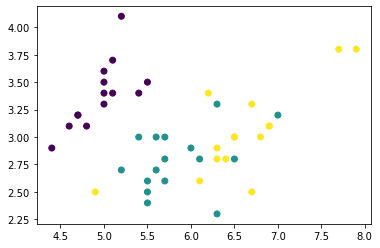

In [302]:
 # Построим визуализацию предсказания для тестовой выборки и центров классов
plt.scatter(x = X_test['sepal length (cm)'], y = X_test['sepal width (cm)'], c=y_test)
plt.show()

In [303]:
small_train = X_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 1) | (y_test == 2)]

In [304]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [305]:
# Определим на наши центроиды
lda_small.means_

array([[5.02222222, 3.44444444],
       [5.97647059, 2.76176471],
       [6.58857143, 2.94571429]])

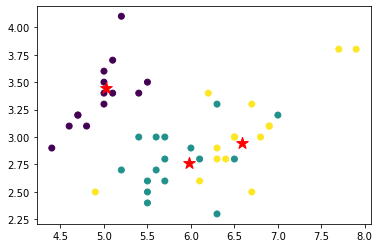

In [306]:
# сам scatter plot
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

### Пункт 6

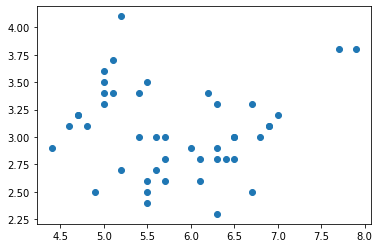

In [335]:
# Отбросим целевую переменную и оставим два признака - sepal_length и sepal_width
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'])
plt.show()

### Пункт 7
#### Подберем оптимальное число кластеров для алгоритма kmeans и визуализируем полученную кластеризацию

In [336]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler

In [337]:
scaler = StandardScaler()

In [338]:
X_scaled = scaler.fit_transform(X_test)

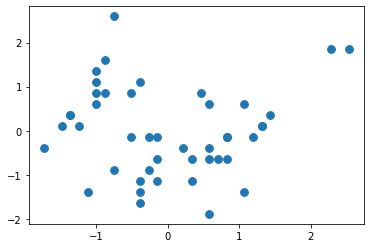

In [341]:
plt.scatter(X_scaled[:,0], X_scaled[:, 1], cmap='autumn', s=60)

In [342]:
from sklearn.cluster import KMeans

In [343]:
# Для определения потимального числа кластеров построим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(2, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

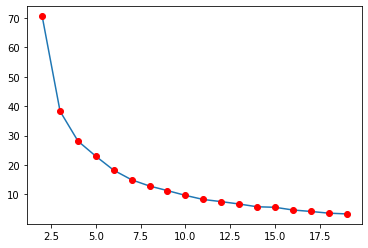

In [344]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
# Исходя из полученношо графика, считаю 3 оптимальным количеством кластеров. 
# Визуализируем полученную кластеризацию

In [347]:
# указываем количество кластеров
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 0,
       2, 2, 2, 1, 2, 1, 0, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2,
       2])

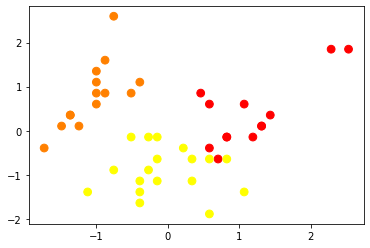

In [348]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)